#### Problem 11-12

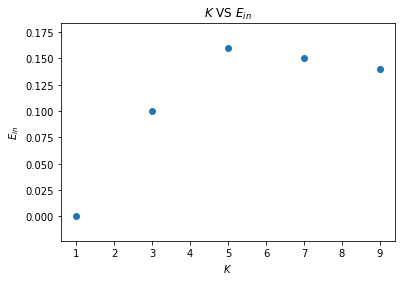

In [3]:
import numpy as np
import matplotlib.pyplot as plt

#读取数据
train = np.loadtxt("hw8_train.dat")
test = np.loadtxt("hw8_test.dat")
X_train, y_train = train[:, :-1], train[:, -1]
X_test, y_test = test[:, :-1], test[:, -1]

class KNeighborsClassifier_():
    def __init__(self, n_neighbors):
        self.n_neighbors = n_neighbors
        
        
    def fit(self, X, y):
        self.X = X
        self.y = y
        
    def predict(self, X):
        #计算距离矩阵
        d1 = np.sum(X ** 2, axis=1).reshape(-1, 1)
        d2 = np.sum(self.X ** 2, axis=1).reshape(1, -1)
        dist = d1 + d2 - 2 * X.dot(self.X.T)
        
        #找到最近的k个点的索引
        index = np.argsort(dist, axis=1)[:, :self.n_neighbors]
        #计算预测结果
        y = np.sign(np.sum(self.y[index], axis=1))
        
        return y

# Q11-12
K = [1, 3, 5, 7, 9]
Ein = []
for k in K:
    #训练模型
    knn = KNeighborsClassifier_(n_neighbors=k)
    knn.fit(X_train, y_train)
    #预测结果
    y = knn.predict(X_train)
    ein = np.mean(y != y_train)
    Ein.append(ein)

plt.scatter(K, Ein)
plt.title("$K$ VS $E_{in}$")
plt.xlabel("$K$")
plt.ylabel("$E_{in}$")
plt.show()

#### Problem 13-14

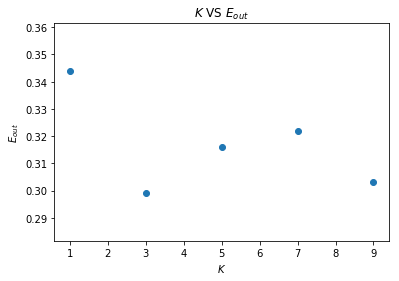

In [4]:
# Q13-14
K = [1, 3, 5, 7, 9]
Eout = []
for k in K:
    #训练模型
    knn = KNeighborsClassifier_(n_neighbors=k)
    knn.fit(X_train, y_train)
    #预测结果
    y = knn.predict(X_test)
    eout = np.mean(y != y_test)
    Eout.append(eout)

plt.scatter(K, Eout)
plt.title("$K$ VS $E_{out}$")
plt.xlabel("$K$")
plt.ylabel("$E_{out}$")
plt.show()

#### Problem 15-16

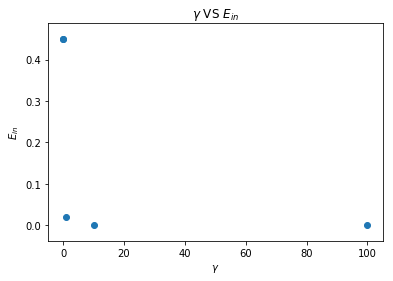

In [5]:
class RBFNetworkClassifier():
    def __init__(self, gamma):
        self.gamma = gamma
        self.beta = None

    def fit(self, X, y):
        self.X = X
        self.y = y
        
    def predict(self, X):
        #计算距离矩阵
        d1 = np.sum(X ** 2, axis=1).reshape(-1, 1)
        d2 = np.sum(self.X ** 2, axis=1).reshape(1, -1)
        dist = d1 + d2 - 2 * X.dot(self.X.T)
        
        #计算exp(-gamma*dist)
        d = np.exp(-self.gamma * dist)
        
        #计算预测结果
        y = np.sign(np.sum(d * self.y, axis=1))
        
        return y

# Q15-16
Gamma = [0.001, 0.1, 1, 10, 100]
Ein_rbf = []
for gamma in Gamma:
    #训练模型
    knn = RBFNetworkClassifier(gamma=gamma)
    knn.fit(X_train, y_train)
    #预测结果
    y = knn.predict(X_train)
    ein = np.mean(y != y_train)
    Ein_rbf.append(ein)

plt.scatter(Gamma, Ein_rbf)
plt.title("$\gamma$ VS $E_{in}$")
plt.xlabel("$\gamma$")
plt.ylabel("$E_{in}$")
plt.show()

#### Problem 17-18

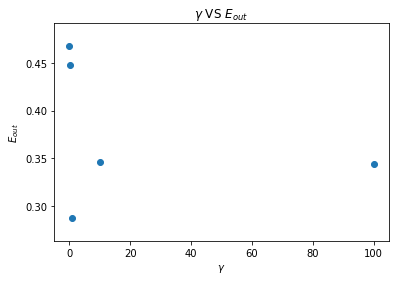

In [6]:
# Q17-18
Gamma = [0.001, 0.1, 1, 10, 100]
Eout_rbf = []
for gamma in Gamma:
    #训练模型
    knn = RBFNetworkClassifier(gamma=gamma)
    knn.fit(X_train, y_train)
    #预测结果
    y = knn.predict(X_test)
    eout = np.mean(y != y_test)
    Eout_rbf.append(eout)

plt.scatter(Gamma, Eout_rbf)
plt.title("$\gamma$ VS $E_{out}$")
plt.xlabel("$\gamma$")
plt.ylabel("$E_{out}$")
plt.show()

#### Problem 19-20

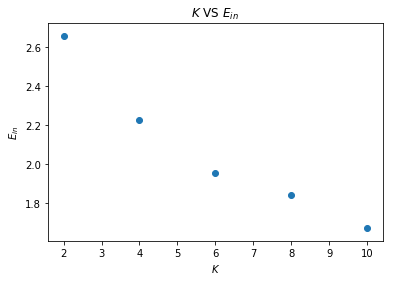

In [3]:
# -*- coding: utf-8 -*-
"""
Created on Fri Apr 19 16:24:00 2019

@author: qinzhen
"""

import numpy as np
import matplotlib.pyplot as plt
X = np.genfromtxt("hw8_nolabel_train.dat")

class KMeans_():
    def __init__(self, k, D=1e-5):
        #聚类数量
        self.k = k
        #聚类中心
        self.cluster_centers_ = []
        #聚类结果
        self.labels_ = []
        #设置阈值
        self.D = D
        
    def fit(self, X):
        #数据维度
        n, d = X.shape
        #聚类标签
        labels = np.zeros(n, dtype=int)
        #初始中心点
        index = np.random.randint(0, n, self.k)
        cluster_centers = X[index]
        #记录上一轮迭代的聚类中心
        cluster_centers_pre = np.copy(cluster_centers)
        
        while True:
            #计算距离矩阵
            d1 = np.sum(X ** 2, axis=1).reshape(-1, 1)
            d2 = np.sum(cluster_centers ** 2, axis=1).reshape(1, -1)
            dist = d1 + d2 - 2 * X.dot(cluster_centers.T)
            
            #STEP1:找到最近的中心
            labels = np.argmin(dist, axis=1)
            #STEP2:重新计算中心
            for i in range(self.k):
                #第i类的索引
                index = (labels==i)
                #第i类的数据
                x = X[index]
                #判断是否有点和某聚类中心在一类
                if len(x) != 0:
                    cluster_centers[i] = np.mean(x, axis=0)
                
            #计算误差
            delta = np.linalg.norm(cluster_centers - cluster_centers_pre)
            
            if delta < self.D:
                break
            
            cluster_centers_pre = np.copy(cluster_centers)
            
        self.cluster_centers_ = np.copy(cluster_centers)
        self.labels_ = labels
        
        
    def predict(self, X):
        #计算距离矩阵
        d1 = np.sum(X ** 2, axis=1).reshape(-1, 1)
        d2 = np.sum(self.cluster_centers_ ** 2, axis=1).reshape(1, -1)
        dist = d1 + d2 - 2 * X.dot(self.cluster_centers_.T)
        
        #找到最近的中心
        self.cluster_centers_ = np.argmin(dist, axis=1)
        
        return self.cluster_centers_

n = X.shape[0]
K = [2, 4, 6, 8, 10]
Ein = []
for k in K:
    #训练模型
    kmeans = KMeans_(k)
    kmeans.fit(X)
    #获得标签
    label = kmeans.labels_
    #获得聚类中心
    center = kmeans.cluster_centers_
    #计算Ein
    ein = 0
    for i in range(k):
        #计算每一类的误差
        ein += np.sum((X[label==i] - center[i]) ** 2)
    #计算均值
    ein /= n
    Ein.append(ein)
    
plt.scatter(K, Ein)
plt.title("$K$ VS $E_{in}$")
plt.xlabel("$K$")
plt.ylabel("$E_{in}$")
plt.show()